In [1]:
!pip install pandas scikit-learn


In [4]:
data = pd.read_csv("/content/fertilizer_recommendation.csv")  # Update path


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
le_soil = LabelEncoder()
data['Soil Type'] = le_soil.fit_transform(data['Soil Type'])

le_crop = LabelEncoder()
data['Crop Type'] = le_crop.fit_transform(data['Crop Type'])


In [6]:
X = data.iloc[:, :8]  # First 8 columns as features
y = data.iloc[:, -1]  # Last column as target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [9]:
y_pred = dtc.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [11]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [12]:
train_acc = dtc.score(X_train, y_train)
test_acc = dtc.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 1.00


In [13]:
print(data.head())


   Temparature  Humidity  Soil Moisture  Soil Type  Crop Type  Nitrogen  \
0           26        52             38          4          3        37   
1           29        52             45          2          8        12   
2           34        65             62          0          1         7   
3           32        62             34          3          9        22   
4           28        54             46          1          6        35   

   Potassium  Phosphorous Fertilizer Name  
0          0            0            Urea  
1          0           36             DAP  
2          9           30        14-35-14  
3          0           20           28-28  
4          0            0            Urea  


In [14]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)

In [15]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dtc, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")


Cross-validation scores: [0.95       0.9        0.9        0.85       0.94736842]
Mean accuracy: 0.91


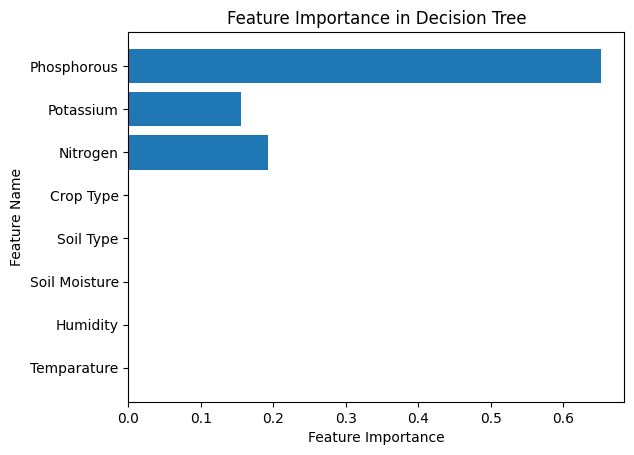

In [16]:
import matplotlib.pyplot as plt

feature_importances = dtc.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Decision Tree")
plt.show()


In [17]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)

In [18]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dtc, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")


Cross-validation scores: [0.95       0.9        0.9        0.85       0.94736842]
Mean accuracy: 0.91


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],  # Try different depths
    'min_samples_split': [2, 5, 10],  # Control how nodes split
    'min_samples_leaf': [1, 2, 4],  # Ensure nodes have enough samples
    'criterion': ['gini', 'entropy']  # Test different split criteria
}

# Run grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the best model
best_model = grid_search.best_estimator_


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rfc, X, y, cv=5)
print(f"Random Forest Mean Accuracy: {np.mean(rf_cv_scores):.2f}")


Random Forest Mean Accuracy: 0.98


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the training set
train_preds = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Predict on the test set
test_preds = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 1.00


In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")


Cross-validation scores: [0.95 1.   0.95 0.95 1.  ]
Mean cross-validation accuracy: 0.97
